Package loading

In [1]:
using Plots
using Combinatorics
using LinearAlgebra
using Cuba
using Symbolics
using DelimitedFiles
using QuadGK
using BenchmarkTools
using FastGaussQuadrature
using Interpolations
using HomotopyContinuation
include("definitions.jl")
include("1slice.jl")
include("wynn.jl")

wynn (generic function with 1 method)

# Integration in Sector I

## Plots of the integrand

In [ ]:
bsI = [range(-sqrt((10-10*a1)^2/2), -sqrt((10-10*a1)^2/4), 100) for a1 in 2:4]
#scatter(bsI, [real(InvSqtDet_SL_ϑ_simpl_10_30(-b)) for b in bsI],yscale=:ln)
#scatter(bsI, [real(Ampl_vertex_I_simpl_10_30(-b, 2.0, 4.0, 0.05)) for b in bsI])
#scatter(bsI, [real((-b)*Ampl_vertex_I_simpl_10_30(-b, 2.0, 4.0, 0.05)) for b in bsI])

In [ ]:
det_hess = [[Det_SL_ϑ(10.0, 10.0*(n), -b) for b in bsI[n]] for n in 1:3]

In [ ]:
#plot(bsI[3:100], [real(10.0^(-25.5) * b^2 * (sqrt(complex((10 - 30)^2/4 - b^2)))^(15.5) * (sqrt(complex((10 - 30)^2/2 - b^2)))^(-5)) for b in bsI[3:100]])
#scatter(bsI[1][2:100], [real(1/sqrt(complex(det_hess[1][i]))) for i in 2:100])
#scatter!(bsI[1][2:100], [imag(1/sqrt(complex(det_hess[1][i]))) for i in 2:100])
scatter(bsI[2][2:100], [real(1/sqrt(complex(det_hess[2][i]))) for i in 2:100])
#scatter!(bsI[2][2:100], [imag(1/sqrt(complex(det_hess[2][i]))) for i in 2:100])
#scatter(bsI[3][1:100], [real(1/sqrt(complex(det_hess[3][i]))) for i in 1:100], yscale=:ln)
#scatter!(bsI[3:100], [abs(imag(1/sqrt(complex(det_hess[i])))) for i in 3:100])

In [ ]:
bsI = range(sqrt((10-30)^2/4) + 1e9*eps(Float64), sqrt((10-30)^2/2) - 6*eps(Float64), 400)
det_hess = [Det_SL_ϑ(10.0, 30.0, b) for b in bsI]

In [ ]:
bsI[2]

In [ ]:
det_hess[150:400]

In [ ]:
HessianSLϑ_gf(10.0, 30.0, 14.14)[1:3,1:3]

In [ ]:
scatter(bsI[150:400], [real(det_hess[i]) for i in 150:400],ylims=(-5e21,5e21))
scatter!(bsI[150:400], [imag(det_hess[i]) for i in 150:400])

In [ ]:
scatter(bsI[1:399], [real(1/sqrt(complex(det_hess[i]))) for i in 1:399])
scatter!(bsI[1:399], [imag(1/sqrt(complex(det_hess[i]))) for i in 1:399])

## Simplification of integrand

In [ ]:
function InvSqtDet_SL_ϑ_simpl_10_30(b::Float64)

    res =  10.0^(-20.0) * b^2 * (sqrt(complex((10 - 30)^2/4 - b^2)))^(15.5) * (sqrt(complex((10 - 30)^2/2 - b^2)))^(-5)

    real(res)
    
end

function Ampl_vertex_I_simpl_10_30(b::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    res = Ampl_face_SL(10.0) * Ampl_face_SL(30.0) * Ampl_face_SL(b) * (exp(im * (S_Regge_I(10.0, 30.0, b) + S_phi_SL(10.0, 30.0, b, ϕ0, ϕ1, m)))/sqrt(complex(Det_SL_Id(10.0, 30.0, b))) 
        + ϑb(10.0, 30.0, b)^4 * exp(-im * S_Regge_I(10.0, 30.0, b) - S_phi_SL(10.0, 30.0, b, ϕ0, ϕ1, m))*InvSqtDet_SL_ϑ_simpl_10_30(b))
    
end

In [ ]:
function Z_I_simpl_10_30_vegas(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Z_I_simpl_10_30_suave(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Zb_I_simpl_10_30_vegas(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = vegas( (x,f) -> f[1] = imag(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Zb_I_simpl_10_30_suave(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = suave( (x,f) -> f[1] = real(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = suave( (x,f) -> f[1] = imag(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

In [ ]:
bsI = range(sqrt((10-30)^2/4), sqrt((10-30)^2/2), 400)
μ_10_30 = [1/sqrt(complex(Det_SL_ϑ(10.0, 30.0, b0))) for b0 in bsI[2:400]];
interp_μ_10_30 = linear_interpolation(bsI[2:400], μ_10_30);

Amplitude in Sector I for l0 = 10 and l1 = 30

In [ ]:
function AmplI_10_30(b::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)
    
    Ampl_face_SL(b) * (exp(im * (S_Regge_I(10.0, 30.0, b) + S_phi_SL(10.0, 30.0, b, ϕ0, ϕ1, m)))/sqrt(complex(Det_SL_Id(10.0, 30.0, b))) + ϑb(10.0, 30.0, b)^4 * interp_μ_10_30(b) * exp(-im * (S_Regge_I(10.0, 30.0, b) + S_phi_SL(10.0, 30.0, b, ϕ0, ϕ1, m))))

end 

Using quadrature integration for computing Z and Z_bsq in Sector I and II for varying scalar field

In [ ]:
quadgk(x -> AmplI_10_30(x, 2.0, 4.0, 91 * 1e-3), bsI[2], bsI[400], rtol=1e-3)

In [89]:
Z_II_phi = [quadgk(x -> Ampl_vertex_II(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 2.0 + 0.2*(i - 1), 0.05)), 0, 10.0)[1] for i in 1:21]
Z_bsq_II_phi = [quadgk(x -> -x^2 * Ampl_vertex_II(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 2.0 + 0.2*(i - 1), 0.05)), 0, 10.0)[1] for i in 1:21];

In [83]:
Z_I_phi = [quadgk(x -> AmplI_10_30(x, 2.0, 2.0 + 0.2*(i - 1), 0.05), bsI[2], bsI[400], rtol=1e-3)[1] for i in 1:21];
Z_bsq_I_phi = [quadgk(x -> -x^2 * AmplI_10_30(x, 2.0, 2.0 + 0.2*(i - 1), 0.05), bsI[2], bsI[400], rtol=1e-3)[1] for i in 1:21];

In [85]:
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_phi_Re.txt", real(Z_I_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_phi_Im.txt", imag(Z_I_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_phi_Re.txt", real(Z_bsq_I_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_phi_Im.txt", imag(Z_bsq_I_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_phi_Re.txt", real(Z_II_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_phi_Im.txt", imag(Z_II_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_phi_Re.txt", real(Z_bsq_II_phi))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_phi_Im.txt", imag(Z_bsq_II_phi))

Using quadrature integration for computing Z and Z_bsq in Sector I and II for varying mass

In [90]:
Z_II_m = [quadgk(x -> Ampl_vertex_II(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 4.0, 1e-3 * (1 + 4*i))), 0, 10.0)[1] for i in 0:20]
Z_bsq_II_m = [quadgk(x -> -x^2 * Ampl_vertex_II(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 4.0, 1e-3 * (1 + 4*i))), 0, 10.0)[1] for i in 0:20];

In [93]:
Z_I_m = [quadgk(x -> AmplI_10_30(x, 2.0, 4.0, 1e-3 * (1 + 4*i)), bsI[2], bsI[400], rtol=1e-3)[1] for i in 0:20];
Z_bsq_I_m = [quadgk(x -> -x^2 * AmplI_10_30(x, 2.0, 4.0, 1e-3 * (1 + 4*i)), bsI[2], bsI[400], rtol=1e-3)[1] for i in 0:20];

In [94]:
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_m_Re.txt", real(Z_I_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_m_Im.txt", imag(Z_I_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_m_Re.txt", real(Z_bsq_I_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_m_Im.txt", imag(Z_bsq_I_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_m_Re.txt", real(Z_II_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_m_Im.txt", imag(Z_II_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_m_Re.txt", real(Z_bsq_II_m))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_m_Im.txt", imag(Z_bsq_II_m))

And finally for varying edge lenth

In [41]:
#l1s = [10.0 + 4.0 * i for i in 1:20]
#bsIrange = [range(sqrt((10-l1s[n])^2/4), sqrt((10-l1s[n])^2/2), 400) for n in 1:20]
#μ_10_l1 = [[1/sqrt(complex(Det_SL_ϑ(10.0, l1s[n], b0))) for b0 in bsIrange[n][2:400]] for n in 1:1];

### Importing data from the Cluster:
μ_10_l1_Re =  readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/mu_10_l1_Re.txt")
μ_10_l1_Im =  readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/mu_10_l1_Im.txt")
μ_10_l1 = [[μ_10_l1_Re[n,i] + im * μ_10_l1_Im[n,i] for i in 1:399] for n in 1:20]
interp_μ_10_l1 = [linear_interpolation(bsIrange[n][2:400], μ_10_l1[n]) for n in 1:20];

In [ ]:
function AmplI_10_l1(b::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64, ind::Int64)
    
    Ampl_face_SL(b) * (exp(im * (S_Regge_I(10.0, 10.0 + 4.0 * ind, b) + S_phi_SL(10.0, 10.0 + 4.0 * ind, b, ϕ0, ϕ1, m)))/sqrt(complex(Det_SL_Id(10.0, 10.0 + 4.0 * ind, b))) + ϑb(10.0, 10.0 + 4.0 * ind, b)^4 * interp_μ_10_l1[ind](b) * exp(-im * (S_Regge_I(10.0, 10.0 + 4.0 * ind, b) + S_phi_SL(10.0, 10.0 + 4.0 * ind, b, ϕ0, ϕ1, m))))

end 

In [ ]:
AmplI_10_l1(2.3, 2.0, 4.0, 0.05, 1)

In [52]:
Z_I_l1 = [quadgk(x -> AmplI_10_l1(x, 2.0, 4.0, 0.05, n), bsIrange[n][2], bsIrange[n][400], rtol=1e-3)[1] for n in 1:20];
Z_bsq_I_l1 = [quadgk(x -> -x^2 * AmplI_10_l1(x, 2.0, 4.0, 0.05, n), bsIrange[n][2], bsIrange[n][400], rtol=1e-3)[1] for n in 1:20];

In [55]:
Z_II_l1 = [quadgk(x -> Ampl_vertex_II(10.0, 10.0 + 4.0 * i, x) * exp(im * S_phi_SL(10.0, 10.0 + 4.0 * i, x, 2.0, 4.0, 0.05)), 0.0, bsIrange[i][1])[1] for i in 1:20]
Z_bsq_II_l1 = [quadgk(x -> -x^2 * Ampl_vertex_II(10.0, 10.0 + 4.0 * i, x) * exp(im * S_phi_SL(10.0, 10.0 + 4.0 * i, x, 2.0, 4.0, 0.05)), 0.0, bsIrange[i][1])[1] for i in 1:20];

In [57]:
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_l1_Re.txt", real(Z_I_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_l1_Im.txt", imag(Z_I_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_l1_Re.txt", real(Z_bsq_I_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_l1_Im.txt", imag(Z_bsq_I_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_l1_Re.txt", real(Z_II_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_l1_Im.txt", imag(Z_II_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_l1_Re.txt", real(Z_bsq_II_l1))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_l1_Im.txt", imag(Z_bsq_II_l1))

# Effective spin foam computation in Sector I

In [ ]:
function Z_I_ESF_suave(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Z_I_ESF_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    #[res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

    res = 1/(b1 - b0) * [res_R[1][1], res_I[1][1]]


end

function Zb_I_ESF_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = vegas( (x,f) -> f[1] = imag(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    #[res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

    res = 1/(b1 - b0) * [res_R[1][1], res_I[1][1]]

end

function Zbsq_I_ESF_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(-((b1 - b0) * x[1] + b0)^2 * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = vegas( (x,f) -> f[1] = imag(-((b1 - b0) * x[1] + b0)^2 * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    #[res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

    res = 1/(b1 - b0) * [res_R[1][1], res_I[1][1]]

end

In [ ]:
Z_bsq_I_m_ESF = [Zbsq_I_ESF_vegas(10.0, 30.0, 2.0, 4.0, 1e-3 * (1 + 4*n)) for n in 0:20] 
ZIm_ESF = [Z_I_ESF_vegas(10.0, 30.0, 2.0, 4.0, 1e-3 * (1 + 4*n)) for n in 0:20]

In the Mathematica file, we find that also for effective spin foams, the deviations between III and I and II can become substantial. Is that because of the numerical integration errors?

In [ ]:
a0 = 10.0
a1 = 30.0
ϕ0 = 2.0
ϕ1 = 4.0
n = 20
m = 1e-3(1 + 4*n)
b0 = sqrt((a0 - a1)^2/4)
b1 = sqrt((a0 - a1)^2/2)

#vegas( (x,f) -> f[1] = real( Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

suave( (x,f) -> f[1] = real(-((b1 - b0) * x[1] + b0)^2 * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

Numerical errors are again non-negig

In [5]:
Z_I_m_ESF = [quadgk(x -> Ampl_vertex_I_ESF(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 4.0, 1e-3 * (1 + 4*i))), bsI[2], bsI[400], rtol=1e-3)[1] for i in 0:20];
Z_bsq_I_m_ESF = [quadgk(x -> -x^2 * Ampl_vertex_I_ESF(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 4.0, 1e-3 * (1 + 4*i))), bsI[2], bsI[400], rtol=1e-3)[1] for i in 0:20];

In [6]:
Z_II_m_ESF = [quadgk(x -> Ampl_vertex_II_ESF(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 4.0, 1e-3 * (1 + 4*i))), 0, 10.0)[1] for i in 0:20]
Z_bsq_II_m_ESF = [quadgk(x -> -x^2 * Ampl_vertex_II_ESF(10.0, 30.0, x) * exp(im * S_phi_SL(10.0, 30.0, x, 2.0, 4.0, 1e-3 * (1 + 4*i))), 0, 10.0)[1] for i in 0:20];

In [7]:
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_m_ESF_Re.txt", real(Z_I_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_I_m_ESF_Im.txt", imag(Z_I_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_m_ESF_Re.txt", real(Z_bsq_I_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_I_m_ESF_Im.txt", imag(Z_bsq_I_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_m_ESF_Re.txt", real(Z_II_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_II_m_ESF_Im.txt", imag(Z_II_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_m_ESF_Re.txt", real(Z_bsq_II_m_ESF))
writedlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_bsq_II_m_ESF_Im.txt", imag(Z_bsq_II_m_ESF))

# Integration in Sector II

In [ ]:


function Z_II_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64, ev_min::Int64, ev_max::Int64)

    b0 = sqrt((a0 - a1)^2/4)

    res_R = vegas( (x,f) -> f[1] = b0 * real(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=ev_min, maxevals=ev_max)
    
    res_I = vegas( (x,f) -> f[1] = b0 * imag(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=ev_min, maxevals=ev_max)
    
    [res_R, res_I] #the factor of b0 needs to be added!

end

function Z_II_suave(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    [res_R, res_I] #the factor of b0 needs to be added!


end

# Including bulk slices

## Studying the partition function and its convergence properties

### Finding numerically feasible boundary data and mass parameters

Notice that the range of the spacelike length matters now as it is not pure boundary because of the bulk length. If we take the quantum theory as a guiding principle for the spectrum of length then we now that the continuous series of SU(1,1) has a gap in the spectrum, i.e. spec(Cas) = [1/4,infinity). Thus, we may consider integrating from 1/4 onwards. The divergence of the amplitude (more precisely of the measure) towards vanishing spin (a1) is also something that happened for the frusta and cube model. One can expect that it is in the low-spin regime where the semi-classical approximation does yield significant deviations.

Amplitude falls off as  ~a1^(-16.5) for large a1 and diverges as ~a1^(-1) for a1 -> 0.

Compute upper triangular matrix of Z(b0,b1)

In [ ]:
N = 100
Z = zeros(ComplexF64, N-1, N-1)

for b0 in 2:N

    for b1 in 2:(N - b0 + 2)

        Z[b0-1, b1-1] = vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 3/4, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] + im*(vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 3/4, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e3, maxevals=1e4)[1][1])

    end

end

In [ ]:
suave((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)

In [ ]:
b0 = 10.0
b1 = 5.0
@btime suave((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.001)), 1, 1, minevals=1e4, maxevals=1e5)

Reading in the files from the cluster with N = 500 and mass = 0.05

In [ ]:
Z_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re.txt")
Z_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im.txt")
Z = [Z_Re[i,j]+im*Z_Im[i,j] for i in 1:499, j in 1:499]

In [ ]:
scatter(real(acc_triang(Z,499))[1:499])
scatter!(real(acc_rect(Z,499))[1:499])

In [ ]:
wynn(acc_triang(Z,499))

In [ ]:
wynn(acc_rect(Z,499))

It appears that many points for the partition function Z(b0,b1) are required to finally find convergence. Let's see what the expectation values evaluate to.

Partition function with insertion of b0 and b1 after integrating out a1

In [39]:
N = 200
Zb0 = zeros(ComplexF64, N-1, N-1)
Zb1 = zeros(ComplexF64, N-1, N-1)

for b0 in 2:N

    for b1 in 2:N

        Zb0[b0-1, b1-1] = Z[b0-1,b1-1] * 0.5*b0
        Zb1[b0-1, b1-1] = Z[b0-1,b1-1] * 0.5*b1

    end

end

In [ ]:
scatter(real(acc_triang(Zb0, 499)))
scatter!(real(acc_rect(Zb0, 499)))

In [ ]:
scatter([real(wynn(acc_triang(Zb0,n))) for n in 2:499])
scatter!([real(wynn(acc_rect(Zb0,n))) for n in 2:499])

Partition sum with a1-injection:

In [ ]:
Za1_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Re.txt")
Za1_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Im.txt")
Za1 = [Za1_Re[i,j]+im*Za1_Im[i,j] for i in 1:499, j in 1:499]

In [ ]:
scatter(real(acc_triang(Za1,499))[1:499])
scatter!(real(acc_rect(Za1,499))[1:499])

In [ ]:
scatter([real(wynn(acc_triang(Za1,n))) for n in 2:499])
scatter!([real(wynn(acc_rect(Za1,n))) for n in 2:499])

In [ ]:
wynn(acc_rect(Za1,499))/wynn(acc_rect(Z,499))

With triangular accumulation, we find\
< b0 > = -13.568329142880918 + 22.02628138021581im\
< b1 > = 29.314769977007018 - 11.455785843906096im\
< a1 > = -1.6823596347078436 - 6.342760580667846im\
\
With rectangular accumulation, we find:\
< b0 > = -13.060588777731821 + 22.049819124267497im\
< b1 > = 32.06379857344938 - 11.073574855471811im\
< a1 > = -1.9547414099552123 - 6.351774571495556im

For comparison, the classical solutions of the strut length b0 and b1 for a mass m = 0.05 are given by\
b0 = 2.20099\
b1 = 3.04159\
a1 = 17.8345

Clearly, deviations are strong. However, the classical solutions for b0 and b1 are also very small so it might be that they do not get sufficiently resolved. Should we try smaller mass values?

In [ ]:
@btime vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*5, 0.5*10, 2.0, 4.0, 0.001)), 1, 1, minevals=1e3, maxevals=1e4)

In [35]:
N = 200
Z = zeros(ComplexF64, N-1, N-1)

for b0 in 2:N

    for b1 in 2:(N - b0 + 2)

        Z[b0-1, b1-1] = vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 3.5, 0.01)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] + im*(vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 3.5, 0.01)), 1, 1, minevals=1e3, maxevals=1e4)[1][1])

    end

end

In [36]:
N = 200
Za1 = zeros(ComplexF64, N-1, N-1)

for b0 in 2:N

    for b1 in 2:(N - b0 + 2)

        Za1[b0-1, b1-1] = vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * (1/(1 - x[1]) - 1/2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 3.5, 0.01)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] + im*(vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * (1/(1 - x[1]) - 1/2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 3.5, 0.01)), 1, 1, minevals=1e3, maxevals=1e4)[1][1])

    end

end

In [ ]:
scatter(real(acc_triang(Z,199)))

In [ ]:
wynn(acc_triang(Z,199))

In [ ]:
scatter(real(acc_triang(Zb1,199)))

In [ ]:
scatter(real(acc_triang(Za1,199)))

In [ ]:
wynn(acc_triang(Zb0,199))/wynn(acc_triang(Z,199))

In [ ]:
wynn(acc_triang(Zb1,199))/wynn(acc_triang(Z,199))

In [ ]:
wynn(acc_triang(Za1,199))/wynn(acc_triang(Z,199))

With triangular accumulation, we find\
< b0 > = 14.315420974485091 - 1.8301095987131382im\
< b1 > = 33.24461089536616 - 24.250944533182302im\
< a1 > = 3.6869854266050757 - 0.5468454193873911im

For comparison, the classical solutions of the strut length b0 and b1 for a mass m = 0.001 are given by\
b0 = 4.19785\
b1 = 14.5793\
a1 = 16.7916

Results of the path integrand get more reasonable as the solutions for the strut length are larger. Is that because of the discrete spectrum?

Let's try for the boundary data a0 = 10, a2 = 30, phi2 = 3.6, m = 10^-3

With triangular accumulation, we find\
< b0 > = 8.07694751450855 - 1.387288821305193im\
< b1 > = 54.91539672003381 - 13.755564412224349im\
< a1 > = 17.935469324559747 - 4.170896466876663im

For comparison, the classical solutions of the length variables are given by\
b0 = 11.5177\
b1 = 35.1933\
a1 = 17.2118

For the boundary data a0 = 10, a2 = 30, phi2 = 3.5, m = 10^-3

In [ ]:
wynn(acc_triang(Za1,199))/wynn(acc_triang(Z,199))

With triangular accumulation, we find\
< b0 > = 3.1173826841083585 - 1.8479672624837062im\
< b1 > = 31.430605309860965 - 7.860581053046336im\
< a1 > = 12.157603991882583 - 0.6823563401264517im

For comparison, the classical solutions of the length variables are given by\
b0 = 25.5484\
b1 = 70.527\
a1 = 17.5351

For the boundary data a0 = 10, a2 = 30, phi2 = 3.5, m = 10^-2

In [ ]:
wynn(acc_triang(Za1,199))/wynn(acc_triang(Z,199))

With triangular accumulation, we find\
< b0 > = 3.4513491709539745 - 2.3999451196424073im\
< b1 > = 18.810487665056364 + 13.002649450854372im\
< a1 > = 1.5969372112486206 - 0.01469356985203779im

For comparison, the classical solutions of the length variables are given by\
b0 = 7.66037\
b1 = 16.0579\
a1 = 17.8195

### Partition function and expectation values for varying scalar field values

In [ ]:
phi_range = [35, 36, 37, 38, 39, 40]
Z_Re = [readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_m0001_phi$n.txt") for n in phi_range]
Z_Im = [readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_m0001_phi$n.txt") for n in phi_range]
Z = [[Z_Re[n][i,j]+im*Z_Im[n][i,j] for i in 1:499, j in 1:499] for n in 1:length(phi_range)]
Za1_Re = [readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Re_m0001_phi$n.txt") for n in phi_range]
Za1_Im = [readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Im_m0001_phi$n.txt") for n in phi_range]
Za1 = [[Za1_Re[n][i,j]+im*Za1_Im[n][i,j] for i in 1:499, j in 1:499] for n in 1:length(phi_range)]

In [3]:
N = 500
Zb0 = [zeros(ComplexF64, N-1, N-1) for n in 1:length(phi_range)]
Zb1 = [zeros(ComplexF64, N-1, N-1) for n in 1:length(phi_range)]

for n in 1:length(phi_range)

    for b0 in 2:N

        for b1 in 2:(N - b0 + 2)

            Zb0[n][b0-1, b1-1] = Z[n][b0-1,b1-1] * 0.5*b0
            Zb1[n][b0-1, b1-1] = Z[n][b0-1,b1-1] * 0.5*b1

        end

    end

end

Let's explore the partition function and its stationary points for the data from the cluster:\
\
For boundary data l_0 = 10, l_1 = 30, phi_0 = 2, phi_2 = 4, m = 10^-3, the classical solutions are given by\
\
b0 = 4.19785\
b1 = 14.5793\
a1 = 16.7916\
\
So after integrating out a1, there should be a saddle point visible at the values of b0 and b1. \
\
Just by looking at the integrand, one cannot see a saddle point. Next steps:
1. Insert the numerical solution for a1 into the amplitude and compare to the effective one after integrating out a1
2. Look for boundary data and mass parameters where the saddle point can be sufficiently resolved 

In [7]:
Z_class = [Ampl_1slice(10.0, 16.791619482961312911, 30.0, 0.5 * b0, 0.5 * b1, 2.0, 4.0, 1e-3) for b0 in 2:500, b1 in 2:500];

In [ ]:
scatter([0.5*b0 for b0 in 2:500][1:50], real(Z[6][8,1:50])./maximum(real(Z[6][8,1:50])))
scatter!([0.5*b0 for b0 in 2:500][1:50], real(Z_class[8,1:50])./maximum(real(Z_class[8,1:50])))

Apparently, effective action and action evaluated on the solution of a1 don't match at all. Is it because of the numerical integration? Let's consider integration in the relevant region, i.e. for b0,b1 < 25.

In [ ]:
Z_test = [vegas((x,f) -> f[1] = real((1/(1 - x[1]) - 1/2)^5 * 1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.001)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] + im*vegas((x,f) -> f[1] = imag((1/(1 - x[1]) - 1/2)^5 * 1/((1 - x[1])^2) * Ampl_1slice(10.0,  1/(1 - x[1]) - 1/2, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.001)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] for b0 in 2:50, b1 in 2:50]

In [ ]:
scatter([0.5*b0 for b0 in 2:500][1:49], real(Z_test[8,1:49])./maximum(real(Z_test[8,1:49])))
scatter!([0.5*b0 for b0 in 2:500][1:49], real(Z_class[8,1:49])./maximum(real(Z_class[8,1:49])))

In [ ]:
plot(10.0:0.01:30.0, [real(a1^5 * Ampl_1slice(10.0, a1, 30.0, 4.1978508181089585939, 14.579304574526164610, 2.0, 4.0, 0.001)) for a1 in 10.0:0.01:30.0])


Here, the saddle point is clearly visible!

I think that the problem becomes clear now: The measure as a function of a1 is strongly peaked on small values of a1. Consequently, the MonteCarlo integration will favor these configurations thus not properly scanning the large a1-regime where the saddle point might be located. \
We have seen above that re-scaling the amplitude helps in resolving these saddle points. The question is how we go on from this.\
It must be noted that the face amplitudes strongly influence the numerical behavior (maybe not so much the physical one), as it makes numerical integration potentially difficult and also yields convergence problems for the series acceleration. 

In [ ]:
b0_expvals = [wynn(acc_triang(Zb0[n],49))/wynn(acc_triang(Z[n],499)) for n in 1:length(phi_range)]
b1_expvals = [wynn(acc_triang(Zb1[n],499))/wynn(acc_triang(Z[n],499)) for n in 1:length(phi_range)]
a1_expvals = [wynn(acc_triang(Za1[n],199))/wynn(acc_triang(Z[n],199)) for n in 1:length(phi_range)]

In [ ]:
wynn([sum(Z[6][1:n,1:n]) for n in 1:499])

In [ ]:
scatter(real(acc_triang(Z[6],499)))

In [ ]:
scatter([real(wynn(acc_triang(Z[2],n))) for n in 2:199])

In [ ]:
wynn(acc_triang(Za1[2],199))/wynn(acc_triang(Z[2],199))

The data doesn't lead to reasonable results for the expectation values. Somehow, the computations where less enumerations are being used work better. Why?!

It seems that for a mass m = 0.001, the oscillations are too small. One can see that for this data the partition function does not constantly oscillate at the cutoff considered.\
\
This seems to be arising from the epsilon-algorithm

### Replace integration with summation?

Numerical integration is challenging because of the VERY fast oscillations. A high number of evaluations is required for acceptable convergence which takes a long time. Maybe the integration can be approximated by summation using Wynn's algorithm. 

In [ ]:
b0 = 1.0
b1 = 20.0
as = range(0.25,40,1000)
as_disc = 0.25:0.1:40.0
plot(as, [real(Ampl_1slice(10.0, a1, 30.0, b0, b1, 2.0, 4.0, 0.05)) for a1 in as])#, ylims=(-10^(-19),10^(-19)), yticks=(-7*10^(-17):10^(-17):7*10^(-17)))
scatter!(as_disc, [real(Ampl_1slice(10.0, a1, 30.0, b0, b1, 2.0, 4.0, 0.05)) for a1 in as_disc])
#plot(as, [real(Ampl_1slice_ESF(10.0, a1, 30.0, 1.0, 40.0, 2.0, 4.0, 0.05)) for a1 in as])

Integration value for comparison

In [ ]:
b0 = 50.0
b1 = 40.0
@btime  vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0, 1/(1 - x[1]) - 3/4, 30.0, b0, b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e2, maxevals=1e3)

Let's try to approximate the integral with a sum and use Wynn's algorithm. How does the convergence of partial sums depend on the chosen discretization?

In [ ]:
part_sum_Re = accumulate(+, [real(Ampl_1slice(10.0, a1, 30.0, 1.0, 20.0, 2.0, 4.0, 0.05)) for a1 in as_disc])
part_sums_Re = [part_sum_Re[n] for n in 1:length(as_disc)]
scatter([a for a in as_disc], part_sums_Re, ylims=(-1.5*10^(-15),-8*10^(-16)), yticks=-10^(-14):10^(-16):0)

In [ ]:
part_sum = accumulate(+, [Ampl_1slice(10.0, a1, 30.0, 1.0, 20.0, 2.0, 4.0, 0.05) for a1 in as_disc])
part_sums = [part_sum[n] for n in 1:length(as_disc)]
wynn(part_sums[350:398])

Okay, Wynn's algorithm can be used to compute the convergence of the partial sums for the very last values, i.e. when the relative error is already small. 

What happens after refinement of the spectrum?

In [ ]:
as_disc_ref = [0.25:0.005*(11-n):40.0 for n in 1:10]
part_sum_Re = [accumulate(+, [real(Ampl_1slice(10.0, a1, 30.0, 1.0, 20.0, 2.0, 4.0, 0.05)) for a1 in as_disc_ref[n]]) for n in 1:10]
part_sums_Re = [[part_sum_Re[m][n] for n in 1:length(as_disc_ref[m])] for m in 1:10]
scatter(as_disc_ref[10], part_sums_Re[10])#, ylims=(-1.5*10^(-15),-8*10^(-16)), yticks=-10^(-14):10^(-16):0)

There doesn't seem to be convergence towards a particular value of Z under refinement. In particular, the behavior is not monotonic, i.e. for a finer spectrum, the partition function may be larger or smaller than for the coarser one. However, the saddle point is captured equally well by all the spectra. The question is now, whether the particular value of Z is not of importance to expectation values. 

Let's just try, first for a1 = 0.25:0.01:40.0, as all the saddle points appear to be captured

Including the idea of Riemann sums

In [ ]:
as_disc_ref = [0.25:0.001*(11-n):40.0 for n in 1:10]
part_sum_Re = [accumulate(+, [real(Ampl_1slice(10.0, a1, 30.0, 1.0, 20.0, 2.0, 4.0, 0.05)) * 0.001*(11-n) for a1 in as_disc_ref[n]]) for n in 1:10]
scatter(as_disc_ref[8:10], part_sum_Re[8:10],markerstrokewidth=0.0)#, ylims=(-1.5*10^(-15),-8*10^(-16)), yticks=-10^(-14):10^(-16):0)

Wynn's algorithm doesn't work for certain values. Use simple summation?

In [ ]:
b0 = 40.0
b1 = 40.0
part_sums = accumulate(+, [Ampl_1slice(10.0, a1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05) for a1 in as_disc_ref[1]])
relerr = [abs(abs(real(part_sums[n+1]-part_sums[n]))/real(part_sums[n])) for n in 1:(length(as_disc_ref[1])-1)]
scatter(as_disc_ref[1][1:(length(as_disc_ref[1])-1)], relerr, ylims = (0.0,10^(-6)))

In [ ]:
@btime sum([Ampl_1slice(10.0, a1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05) for a1 in as_disc_ref[10]]) 

In [ ]:
Zb0b1 = [sum([Ampl_1slice(10.0, a1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05) for a1 in as_disc_ref[1]]) for b0 in 1:120, b1 in 1:120]

In [ ]:
scatter(real(Zb0b1)[70,1:120])

In [ ]:
scatter(real(acc_triang(Zb0b1,120)))

Summation does not work as straightforwardly as expected. I therefore went back to the numerical integration, driving up the evaluation and passing the computation to the cluster

### Replacing MC-integration by quadrature

In [ ]:
b0 = 4.0
b1 = 14.0
vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(10.0, 1/(1 - x[1]) - 3/4, 30.0, b0, b1, 2.0, 4.0, 0.001)), 1, 1, minevals=1e4, maxevals=1e5)

In [ ]:
@btime quadgk(x -> Ampl_1slice(10.0, x, 30.0, 1.0, 20.0, 2.0, 4.0, 0.001), 0.5, Inf)

In [ ]:
@btime quadgk(x -> Ampl_1slice(10.0, x, 30.0, 1.0, 20.0, 2.0, 4.0, 0.001), 0.5, Inf, rtol=1e-3)

In [60]:
Z_test = [quadgk(x -> Ampl_1slice(10.0, x, 30.0, 0.5 * b0, 0.5 * b1, 2.0, 4.0, 0.001), 0.5, Inf, rtol=1e-3)[1] for b0 in 2:50, b1 in 2:50]
Z_class = [Ampl_1slice(10.0, 16.791619482961312911, 30.0, 0.5 * b0, 0.5 * b1, 2.0, 4.0, 1e-3) for b0 in 2:50, b1 in 2:50];

In [ ]:
scatter(1:0.5:25, real(Z_test[8,1:49])./abs(maximum(real(Z_test[8,1:49]))))
scatter!(1:0.5:25, real(Z_class[8,1:49])./abs(maximum(real(Z_class[8,1:49]))))

The picture remains and so we can rule out that there is something wrong with the numerical integration algorithm. Instead, I believe that it is the face amplitudes that lead to strong deviations. It might be important that the integration domain is not all of R and therefore, intuition from the stationary phase approximation (e.g. that the measure "doesn't matter") is not applicable.

In [ ]:
For comparison, the classical solutions of the strut length b0 and b1 for a mass m = 0.05 are given by\
b0 = 2.20099\
b1 = 3.04159\
a1 = 17.8345

In [78]:
#Z_test = [quadgk(x -> Ampl_1slice(10.0, x, 30.0, 0.5 * b0, 0.5 * b1, 2.0, 4.0, 0.01), 0.5, Inf, rtol=1e-3)[1] for b0 in 2:50, b1 in 2:50]
Z_class = [Ampl_1slice(10.0, 17.268230899854599393, 30.0, 0.5 * b0, 1.0 * b1, 2.0, 4.0, 0.01) for b0 in 2:50, b1 in 2:50];

In [ ]:
scatter(1:0.5:25, real(Z_test[7,1:49])./abs(maximum(real(Z_test[7,1:49]))))
scatter!(1:0.5:25, real(Z_class[7,1:49])./abs(maximum(real(Z_class[7,1:49]))))

Stationary point not visible and frequency is much higher for the effective amplitude

Is it the face amplitude?

In [ ]:
Z_test = [quadgk(x -> x^7 * Ampl_1slice(10.0, x, 30.0, 0.5 * b0, 0.5 * b1, 2.0, 4.0, 0.01), 0.5, Inf, rtol=1e-3)[1] for b0 in 2:50, b1 in 2:50]

In [ ]:
scatter(1:0.5:25, real(Z_test[7,1:49])./abs(maximum(real(Z_test[7,1:49]))))
scatter!(1:0.5:25, real(Z_class[7,1:49])./abs(maximum(real(Z_class[7,1:49]))))

The frequency of the effecitve amplitude seems to depend on the face amplitude. Isn't that strange?

What is the result for the effective spin foam measure?

In [ ]:
(1.0:0.5:25.0)[7]

In [ ]:
b0sol = 3.2823807872544535257
b1sol = 11.015937763259090151
a1sol = 16.699540895401283015
phi_2 = 4.2
m = 0.001   
Z_eff_ESF_vegas = [vegas((x,f) -> f[1] = real((1/(1 - x[1]) - 1/2)^(-2) * 1/((1 - x[1])^2) * Ampl_1slice_ESF(10.0,  1/(1 - x[1]) - 1/2, 30.0, b0sol, 0.25 * b1, 2.0, phi_2, 0.001)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] + im*vegas((x,f) -> f[1] = imag((1/(1 - x[1]) - 1/2)^(-2) *  1/((1 - x[1])^2) * Ampl_1slice_ESF(10.0,  1/(1 - x[1]) - 1/2, 30.0, b0sol, 0.5 * b1, 2.0, phi_2, 0.001)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] for b1 in 2:200];
Z_class = [Ampl_1slice(10.0, a1sol, 30.0, b0sol, 0.5* b1, 2.0, phi_2, 0.001) for b1 in 2:200];
#Z_eff_ESF_quadgk = [quadgk(x -> Ampl_1slice_ESF(10.0, x, 30.0, 3.9415073911523056687, 0.5 * b1, 2.0, 4.0, 0.01), 0.5, Inf, rtol=1e-3)[1] for b1 in 2:50];

In [ ]:
plot(range(0.5, 40.0, 2000), [real(Ampl_1slice_ESF(10.0, a1, 30.0, b0sol, 1.0, 4.0, phi_2, 0.001)) for a1 in range(0.5, 40.0, 2000)] )

In [ ]:
plot(1:0.5:100, real(Z_eff_ESF_vegas)./maximum(real(Z_eff_ESF_vegas)))
#scatter!(1:0.5:25, 0.5 .* real(Z_eff_ESF_quadgk)./maximum(real(Z_eff_ESF_quadgk)))
plot!(1:0.5:100, real(Z_class)./maximum(real(Z_class)))

Let's create a little toy model to understand better what is going on

In [ ]:
b0sol = 3.9415073911523056687
b1sol = 11.015937763259090151
a1sol = 17.268230899854599393
ϕ0 = 2.0
ϕ2 = 4.2
m = 0.01
b0 = b0sol
a0 = 10.0
a2 = 30.0
a1 = a1sol

function toy_integrand(a1::Float64, b1::Float64)

    res =  exp(im* (S_Regge_III(10.0, a1, b0sol) + S_Regge_III(a1, 30.0, b1))) * exp(im*((ϕ0 - ϕ2)^2*((w(a0, a1, b0)*w(a1, a2, b1))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) 
    - ϕ0^2*(M(a0, a1, b0, m) + (w(a0, a1, b0)*(M(a0, a1, b0, m) + M(a1, a2, b1, m)))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) 
    - ϕ2^2*(M(a1, a2, b1, m) + (w(a1, a2, b1)*(M(a0, a1, b0, m) + M(a1, a2, b1, m)))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m)))))

end

a1s = range(0.5, 50.0, 1000)
b1s = range(0.5, 20.0, 1000)
plot(b1s, real([toy_integrand(a1sol, b1) for b1 in b1s]))
plot(a1s, real([toy_integrand(a1, 20.0) for a1 in a1s]))
#scatter!(b1s, real(toy_integrand_eff)./maximum(real(toy_integrand_eff)))

In [ ]:
toy_integrand_eff = quadgk(a1 -> toy_integrand(a1, b1sol), 0.5, Inf, rtol=1e-6)

Non-sensical result for numerical integration

In [ ]:
part_int = [quadgk(a1 -> toy_integrand(a1, 18.5), 0.5, amax, rtol=1e-6)[1] for amax in 5.0:0.5:50.0]
#part_int_a1 = [quadgk(a1 -> a1 * toy_integrand(a1, b1sol), 0.5, amax, rtol=1e-6)[1] for amax in 1.0:0.5:50.0]
scatter(5.0:0.5:50.0, real(part_int))

Does wynn's algorithm save our day?

In [ ]:
part_int = [wynn([quadgk(a1 -> toy_integrand(a1, 0.5 * b1), 0.5, amax, rtol=1e-6)[1] for amax in 5.0:0.25:25.0]) for b1 in 2:40]

In [ ]:
scatter((1.0:0.5:20.0), real(part_int))

pseudo-saddle points?

In [ ]:
scatter(5.0:0.25:100.0, [real(toy_integrand(a1, 18.5)) for a1 in 5.0:0.25:100.0])

### a1-Integration revisited

Let's fix all of the data including the bulk variables m_0 and m_1.

In [ ]:
b0sol = 3.9415073911523056687
b1sol = 11.015937763259090151
a1sol = 17.268230899854599393

b0 = 4.0
b1 = 11.0
ϕ0 = 2.0
ϕ2 = 4.2
m = 0.01
a0 = 10.0
a2 = 30.0

The a1-integrand looks like the following:

In [ ]:
plot(0.5:0.01:25.0, [real(Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.01:25.0])

In particular, there is a saddle point at a1 ~ 17

In [ ]:
plot(10.0:0.001:30.0, [real(Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 10.0:0.001:30.0])

The saddle point is almost invisible due to the strong suppression. Maybe try the ESF amplitude first

In [ ]:
plot(0.5:0.01:25.0, [real(Ampl_1slice_ESF(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.01:25.0])

Quadrature methods for computing a1-integration

In [ ]:
Z_quad = quadgk_count(a1 -> Ampl_1slice_ESF(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), 0.5, Inf)

In [ ]:
Z_quad = quadgk_count(a1 -> Ampl_1slice_ESF(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), 0.5, Inf, order=100)

Vegas-algorithm

In [ ]:
vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice_ESF(a0,  1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6) 

In [ ]:
vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice_ESF(a0,  1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6)

Quadrature and vegas integration seem to agree. What happens for our amplitude?

In [ ]:
Z_quad = quadgk_count(a1 -> Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), 0.5, Inf, order=20)

In [ ]:
vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(a0,  1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6) 

In [ ]:
vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice(a0,  1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6)

Also here, pretty decent agreement!

Different boundary data: let's take b0 and b1 for which the oscillations are worse

In [ ]:
b0 = 1.0
b1 = 2.0
plot(0.5:0.01:50.0, [real(Ampl_1slice_ESF(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.01:50.0])

In [ ]:
quadgk_count(a1 -> Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), 0.5, Inf, order=20)

In [ ]:
vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(a0,  1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6) 

In [ ]:
vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice(a0,  1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6)

The integration methods seem to agree. Let's try again to find an effective amplitude. To that end, we set b0 = 4 such that there should be a saddle point visible at b1 = 11.

In [ ]:
b0 = 4.0
Z_test = [quadgk_count(a1 -> Ampl_1slice(a0, a1, a2, b0, 0.5 * b1, ϕ0, ϕ2, m), 0.5, Inf, order=20)[1] for b1 in 2:50]

In [ ]:
Z_class = [real(Ampl_1slice(a0, a1sol, a2, 4.0, b1, ϕ0, ϕ2, m)) for b1 in 1.0:0.01:25.0]
plot(1.0:0.5:25.0, real(Z_test)./maximum(real(Z_test)))
plot!(1.0:0.01:25.0, Z_class./maximum(Z_class))

Same as before. Use arbitrary prescision?

In [ ]:
setprecision(20, base=10)
b0 = big"4.0"
b1 = big"11.0"
ϕ0 = big"2.0"
ϕ2 = big"4.2"
m = big"0.01"
a0 = big"10.0"
a2 = big"30.0"
quadgk_count(a1 -> Ampl_1slice_ESF_big(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), big"0.5", big"Inf", order=20)

Takes super long

Let's try a different quadrature algorithm

In [ ]:
nodes, weights = gausslobatto(2)

Lobatto doesn't work as the measure diverges at x = -1. Work with GaussRadau

For comaprison the result of quadgk:

-7.095188945138458e-17 + 1.206512260777823e-16im

In [ ]:
[gaussradau(n) for n in 1:3][3][1]

In [ ]:
quad =  [gaussradau(1000*n) for n in [1, 10, 100]]
Ampl_resc(x) = 2/(1 - x)^2 * Ampl_1slice(a0, 2/(1-x) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)
I_monitor = [dot(quad[n][2], Ampl_resc.(quad[n][1])) for n in 1:3]

In [ ]:
dot(weights, Ampl_resc.(nodes))

It's fucking fast!

### Do we get better results for faster oscillations?

In [ ]:
b0sol = 0.0000123564
b1sol = 0.000507388
a1sol = 10.1146

b0 = 1.0
b1 = 2.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 10.0
a0 = 10.0
a2 = 30.0

In [ ]:
plot(0.5:0.001:20.0, [real(Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.001:20.0])

In [12]:
quad= [gaussradau(2000000 + i) for i in 1:2] 
Ampl_resc(x) = 2/(1 - x)^2 * Ampl_1slice(a0, 2/(1-x) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)
I_monitor = [dot(quad[n][2], Ampl_resc.(quad[n][1])) for n in 1:2]

Oscillations not graspable by integration

In [ ]:
#classical sol:
#a1 -> 18.0916, b0 -> 1.27492, b1 -> 1.65973

a1sol = 18.0916

b0 = 1.0
b1 = 1.5
ϕ0 = 2.0
ϕ2 = 2.5
m = 0.1
a0 = 12.0
a2 = 30.0

In [ ]:
plot(0.5:0.001:25.0, [real(Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.001:25.0])

In [ ]:
quadgk_count(a1 -> Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), 0.5, Inf, order=20)

In [ ]:
nodes, weights =  gaussradau(10000)
Ampl_resc(x, b1) = 2/(1 - x)^2 * Ampl_1slice(a0, 2/(1-x) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)
I = dot(weights, Ampl_resc.(nodes, 1.5)) 

In [ ]:
Z_test = [dot(weights, Ampl_resc.(nodes, 0.5 * b1)) for b1 in 2:50]

In [ ]:
Z_class = [real(Ampl_1slice(a0, a1sol, a2, b0, b1, ϕ0, ϕ2, m)) for b1 in 1.0:0.01:10.0]
scatter(1.0:0.5:25.0, real(Z_test)./maximum(real(Z_test)))
#plot(1.0:0.01:10.0, Z_class./maximum(Z_class))

There is an annoying interplay of solutions of the classical equations of motion and the speed of oscillations. More precesily, faster oscillations imply smaller solutions of b0 and b1, making it hard to resolve them with a discrete spectrum.

In [ ]:
#classical sol:
#a1 -> 18.2271, b0 -> 2.04371, b1 -> 2.55839

a1sol = 18.2271

b0 = 2.0
b1 = 2.5
ϕ0 = 2.0
ϕ2 = 2.5
m = 0.08
a0 = 12.0
a2 = 30.0

In [ ]:
plot(0.5:0.001:22.0, [real(Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.001:22.0])

In [ ]:
quadgk_count(a1 -> Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m), 0.5, Inf, order=20)

In [ ]:
Ampl_resc(x, b0, b1) = 2/(1 - x)^2 * Ampl_1slice(a0, 2/(1-x) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)
Ampl_resc_a1(x, b0, b1) = (2/(1-x) - 1/2) * 2/(1 - x)^2 * Ampl_1slice(a0, 2/(1-x) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)
#I = dot(weights, Ampl_resc.(nodes, 2.5)) 

In [ ]:
Z_test = [dot(weights, Ampl_resc.(nodes, 0.5 * b0, 0.5 * b1)) for b0 in 2:50, b1 in 2:50]

In [63]:
Za1_test = [dot(weights, Ampl_resc_a1.(nodes, 0.5 * b0, 0.5 * b1)) for b0 in 2:50, b1 in 2:50];

In [ ]:
Z_class = [real(Ampl_1slice(a0, a1sol, a2, b0, b1, ϕ0, ϕ2, m)) for b1 in 1.0:0.01:25.0]
scatter(1.0:0.5:25.0, real(Z_test)./maximum(real(Z_test)))
plot!(1.0:0.01:25.0, Z_class./maximum(Z_class))

In [ ]:
scatter(real(acc_rect(Z_test, 49)))

In [ ]:
wynn(acc_rect(Z_test, 49))

In [ ]:
Zb0_test = [Z_test[b0-1,b1-1]*0.5*b0 for b0 in 2:50, b1 in 2:50]
Zb1_test = [Z_test[b0-1,b1-1]*0.5*b1 for b0 in 2:50, b1 in 2:50]
wynn(acc_rect(Zb1_test,49))/wynn(acc_rect(Z_test,49))

In [ ]:
wynn(acc_rect(Zb0_test,49))/wynn(acc_rect(Z_test,49))

In [ ]:
wynn(acc_rect(Za1_test,49))/wynn(acc_rect(Z_test,49))

In [ ]:
#{a1 -> 35.709052590533977033, b0 -> 3.7191409095740925785,  b1 -> 4.6800987002406478786}

a1sol = 35.709052590533977033

b0 = 3.5
b1 = 4.5
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.03
a0 = 20.0
a2 = 60.0

#plot(0.5:0.001:60.0, [real(Ampl_1slice(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) for a1 in 0.5:0.001:60.0])
plot(0.5:0.001:80.0, [S_Regge_III(a0, a1, b0) + S_Regge_III(a1, a2, b1) + (ϕ0 - ϕ2)^2*((w(a0, a1, b0)*w(a1, a2, b1))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) - ϕ0^2*(M(a0, a1, b0, m) + (w(a0, a1, b0)*(M(a0, a1, b0, m) + M(a1, a2, b1, m)))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) - ϕ2^2*(M(a1, a2, b1, m) + (w(a1, a2, b1)*(M(a0, a1, b0, m) + M(a1, a2, b1, m)))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) for a1 in 0.5:0.001:80.0])

#a1 = 35.7
#plot(0.5:0.001:80.0, [S_Regge_III(a0, a1, b0) + S_Regge_III(a1, a2, b1) + (ϕ0 - ϕ2)^2*((w(a0, a1, b0)*w(a1, a2, b1))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) - ϕ0^2*(M(a0, a1, b0, m) + (w(a0, a1, b0)*(M(a0, a1, b0, m) + M(a1, a2, b1, m)))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) - ϕ2^2*(M(a1, a2, b1, m) + (w(a1, a2, b1)*(M(a0, a1, b0, m) + M(a1, a2, b1, m)))/(w(a0, a1, b0) + w(a1, a2, b1) - M(a0, a1, b0, m) - M(a1, a2, b1, m))) for b1 in 0.5:0.001:80.0])

We see basically three local extrema and between the action is almost constant. This leads to the very slow intermediate oscillations. Strangely enough, the solution mathematuca spits out only corresponds to the local minimum.

Notice that quadgk works best for integrals that are decaying over a length-scale x ~ 1. For a plynomial decay as here, this is indeed the case.

In [ ]:
Z_test = quadgk_count(a1 -> Ampl_1slice(a0, a1, a2, 1.0, 50.0, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)

The quadrature algorithm can't be easily scaled up as there appear NaN evaluations for some components (and I don't know which...). Vegas gives similar results with minevals=1e5, so let's try this. 

In [ ]:
vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(a0,  1/(1 - x[1]) - 1/2, a2, 1.0, 50.0, ϕ0, ϕ2, m)), 1, 1, minevals=1e5, maxevals=1e6)[1][1]

In [177]:
Z_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_a0=20_a2=60_phi0=2_phi2=4_m=003.txt")
Z_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_a0=20_a2=60_phi0=2_phi2=4_m=003.txt")
Za1_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Re_a0=20_a2=60_phi0=2_phi2=4_m=003.txt")
Za1_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Im_a0=20_a2=60_phi0=2_phi2=4_m=003.txt")
Z = [Z_Re[i,j] + im*Z_Im[i,j] for i in 1:199, j in 1:199];
Za1 = [Za1_Re[i,j] + im*Za1_Im[i,j] for i in 1:199, j in 1:199];
Zb0 = [Z[b0-1, b1-1] * 0.5 * b0 for b0 in 2:200, b1 in 2:200]
Zb1 = [Z[b0-1, b1-1] * 0.5 * b1 for b0 in 2:200, b1 in 2:200];

In [ ]:
(1.0:0.5:100.0)[8]

In [ ]:
Z_class = [real(Ampl_1slice(a0, a1sol, a2, 3.5, b1, ϕ0, ϕ2, m)) for b1 in 180.0:0.01:250.0]
plot(180.0:0.01:250.0, Z_class, ylims=(-5e-23,5e-23))

In [ ]:
scatter(1.0:0.5:25.0, real(Z[6,1:50])./maximum(real(Z[6,1:50])))
Z_class = [real(Ampl_1slice(a0, a1sol, a2, 3.5, b1, ϕ0, ϕ2, m)) for b1 in 1.0:0.01:25.0]
plot!(1.0:0.01:25.0, Z_class./maximum(Z_class))

In [ ]:
scatter([real(wynn(acc_triang(Zb0, n))/wynn(acc_triang(Z, n))) for n in 2:100])

In [ ]:
n = 55
wynn(acc_triang(Zb0, n))/wynn(acc_triang(Z,n))

In [ ]:
scatter(1.0:0.5:100.0, real(Za1[6,1:199]))

In [ ]:
scatter(real(acc_triang(Za1, 199)))

In [ ]:
wynn(acc_triang(Za1, 199))/wynn(acc_triang(Z, 199))

intermediate pseud-saddle points are problematic

For boundary data\
\
a0 = 20\
a2 = 60\
phi0 = 2\
phi2 = 4\
m = 0.02\
\
with classical solutions\
\
a1sol = 35.548348458574615016\
b0sol = 5.1271689388869371872\
b1sol = 8.0238112799056863566

In [183]:
Z_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_a0=20_a2=60_phi0=2_phi2=4_m=002.txt")
Z_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_a0=20_a2=60_phi0=2_phi2=4_m=002.txt")
Za1_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Re_a0=20_a2=60_phi0=2_phi2=4_m=002.txt")
Za1_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Im_a0=20_a2=60_phi0=2_phi2=4_m=002.txt")
Z = [Z_Re[i,j] + im*Z_Im[i,j] for i in 1:199, j in 1:199];
Za1 = [Za1_Re[i,j] + im*Za1_Im[i,j] for i in 1:199, j in 1:199];
Zb0 = [Z[b0-1, b1-1] * 0.5 * b0 for b0 in 2:200, b1 in 2:200]
Zb1 = [Z[b0-1, b1-1] * 0.5 * b1 for b0 in 2:200, b1 in 2:200];

In [ ]:
(1.0:0.5:100.0)[9]

In [ ]:
m = 0.02
scatter(1.0:0.5:100.0, real(Z[9,1:199])./maximum(real(Z[9,1:199])))
Z_class = [real(Ampl_1slice(a0, a1sol, a2, 5.0, b1, ϕ0, ϕ2, m)) for b1 in 1.0:0.01:100.0]
plot!(1.0:0.01:100.0, Z_class./maximum(Z_class))

In [ ]:
scatter(real([wynn(acc_triang(Zb0, n))/wynn(acc_triang(Z, n)) for n in 2:199]))

In [ ]:
scatter(real([wynn(acc_triang(Zb1, n))/wynn(acc_triang(Z, n)) for n in 2:199]))

In [ ]:
wynn(acc_triang(Za1, 199))/wynn(acc_triang(Z, 199))

In [ ]:
scatter(real([wynn(acc_triang(Za1, n))/wynn(acc_triang(Z, n)) for n in 150:199]))

Actually, how does Ampl_1slice behave in the b0,b1-variables when evaluated on a1sol? Do we find linear behavior?\
\
It is linear in the b but only at very large values. Before that, non-linearities of the exponent kick in and obscure convergence of wynn's algorithm. For the boundary looked at above with m = 1e-3, the situation is even worse with very large coefficients in front of the b0^(-1) terms and so on.\
\
It seems that with the variables given here, the bulk slice is extremely hard to tackle.

### Using classical scalar field solutions

Let's consider the follwoing boundary data: 

In [ ]:
a0 = 20.0
a2 = 60.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.02

b0sol = 5.1271689388869371872
b1sol = 8.0238112799056863566
a1sol = 35.548348458574615016

The bulk scalar field evaluated on the clasical solution is given by:

In [ ]:
ϕ1sol = ϕ1_sol(a0, a1sol, a2, b0sol, b1sol, ϕ0, ϕ2, m)

In [ ]:
plot(0.5:0.001:100.0, real([Ampl_1slice_phi1sol(a0, a1, a2, b0sol, b1sol, ϕ0, ϕ1sol, ϕ2, m) for a1 in 0.5:0.001:100.0]))

Let's consider the path integrand with the classical solution injected 

In [ ]:
Z_test = [quadgk(a1 -> Ampl_1slice_phi1sol(a0, a1, a2, b0sol, 0.5 * b1, ϕ0, ϕ1sol, ϕ2, m), 0.0, Inf, rtol=1e-2, order=21)[1] for b1 in 2:50];
Za1_test = [quadgk(a1 -> a1 * Ampl_1slice_phi1sol(a0, a1, a2, b0sol, 0.5 * b1, ϕ0, ϕ1sol, ϕ2, m), 0.0, Inf, rtol=1e-2, order=21)[1] for b1 in 2:50];
Zb0_test = [Z_test[b1-1] * 0.5 * b1 for b1 in 2:50]

In [ ]:
scatter(1.0:0.5:25.0, 2 .* real(Z_test)./maximum(real(Z_test)))
plot!(1.0:0.01:25.0, real([Ampl_1slice_phi1sol(a0, a1sol, a2, b0sol, b1, ϕ0, ϕ1sol, ϕ2, m) for b1 in 1.0:0.01:25.0])./maximum(real([Ampl_1slice_phi1sol(a0, a1sol, a2, b0sol, b1, ϕ0, ϕ1sol, ϕ2, m) for b1 in 1.0:0.01:25.0])))

In [ ]:
wynn(accumulate(+, Za1_test))/wynn(accumulate(+, Z_test))

In [67]:
Z_test = [quadgk(a1 -> Ampl_1slice(10.0, a1, 30.0, 2.2009858371377780375, 0.5 * b1, 2.0, 4.0, 0.05), 0.5, Inf, rtol=1e-2, order=20) for b1 in 2:50]
Za1_test = [quadgk(a1 -> a1 * Ampl_1slice(10.0, a1, 30.0, 2.2009858371377780375, 0.5 * b1, 2.0, 4.0, 0.05), 0.5, Inf, rtol=1e-2, order=20) for b1 in 2:50]

### Trying again for boundary data m = 0.05 \pm 0.001 as that worked (accidentally?) below

In [ ]:
Z_Im_m0049 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_a0=10_a2=30_phi0=2_phi2=4_m=0049.txt")
Z_Re_m0049 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_a0=10_a2=30_phi0=2_phi2=4_m=0049.txt")
Za1_Re_m0049 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Re_a0=10_a2=30=60_phi0=2_phi2=4_m=0049.txt")
Za1_Im_m0049 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Im_a0=10_a2=30_phi0=2_phi2=4_m=0049.txt")

### Let's check the refined data from the cluster

In [2]:
Z_Re_ref = vcat([readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_a0=10_a2=30_phi0=2_phi2=4_m=005_step=05.txt")[1:99,1:99]], [readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_a0=10_a2=30_phi0=2_phi2=4_m=005_step=0$n.txt") for n in [4, 3, 2, 1]])
Z_Im_ref = vcat([readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_a0=10_a2=30_phi0=2_phi2=4_m=005_step=05.txt")[1:99,1:99]] ,[readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_a0=10_a2=30_phi0=2_phi2=4_m=005_step=0$n.txt") for n in [4, 3, 2, 1]])
Z_ref = [[Z_Re_ref[n][i, j] + im*Z_Im_ref[n][i,j] for i in 1:length(Z_Re_ref[n][1,:]), j in 1:length(Z_Re_ref[n][1,:])] for n in 1:5]
ref_steps = [0.5, 0.4, 0.3, 0.2, 0.1]
b_ranges = [0.5:ref_steps[n]:50.0 for n in 1:5]
Ns = [length(b_ranges[n]) for n in 1:5];
Zb0_ref = [[Z_ref[n][i-1, j-1] * b_ranges[n][i] for i in 2:Ns[n], j in 2:Ns[n]] for n in 1:5]
Zb1_ref = [[Z_ref[n][i-1, j-1] * b_ranges[n][j] for i in 2:Ns[n], j in 2:Ns[n]] for n in 1:5];

In [2]:
a0 = 10.0
a2 = 30.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.05

b0sol = 2.2009858371377780375
b1sol = 3.0415927095835082110
a1sol = 17.834492747907284528;

In [ ]:
b_ranges[1][4]
b_ranges[2][5]
b_ranges[3][7]
b_ranges[4][10]
b_ranges[5][18]

In [ ]:
real(Z_ref[1][4,10])

In [ ]:
scatter(b_ranges[1][2:Ns[1]], real(Z_ref[1][4,1:(Ns[1]-1)]), xlims=(0,10), ylims=(-4*10^(-17), 4*10^(-17)))
scatter!(b_ranges[2][2:Ns[2]], real(Z_ref[2][5,1:(Ns[2]-1)]))
scatter!(b_ranges[3][2:Ns[3]], real(Z_ref[3][7,1:(Ns[3]-1)]))
scatter!(b_ranges[4][2:Ns[4]], real(Z_ref[4][10,1:(Ns[4]-1)]))
scatter!(b_ranges[5][2:Ns[5]], real(Z_ref[5][18,1:(Ns[5]-1)]))

#### Expectation values of b0 and b1

In [ ]:
for i in 1:5
    println("<b0>_step0$(5-i+1) = ", wynn(acc_rect(Zb0_ref[i], Ns[i]-1))/wynn(acc_rect(Z_ref[i], Ns[i]-1)))
end

In [ ]:
for i in 1:5
    println("<b0>_step0$(5-i+1) = ", wynn(acc_triang(Zb0_ref[i], Ns[i]-1))/wynn(acc_triang(Z_ref[i], Ns[i]-1)))
end

In [ ]:
for i in 1:5
    println("<b1>_step0$(5-i+1) = ", wynn(acc_rect(Zb1_ref[i], Ns[i]-1))/wynn(acc_rect(Z_ref[i], Ns[i]-1)))
end

In [ ]:
for i in 1:5
    println("<b1>_step0$(5-i+1) = ", wynn(acc_triang(Zb1_ref[i], Ns[i]-1))/wynn(acc_triang(Z_ref[i], Ns[i]-1)))
end

#### Effective action vs. action on solutions of the eom

In [ ]:
scatter(b_ranges[1][2:Ns[1]], real(Z_ref[1][4,1:(Ns[1]-1)]), xlims=(0,5), ylims=(-4*10^(-17), 4*10^(-17)))
scatter!(b_ranges[2][2:Ns[2]], real(Z_ref[2][5,1:(Ns[2]-1)]))
scatter!(b_ranges[3][2:Ns[3]], real(Z_ref[3][7,1:(Ns[3]-1)]))
scatter!(b_ranges[4][2:Ns[4]], real(Z_ref[4][10,1:(Ns[4]-1)]))
scatter!(b_ranges[5][2:Ns[5]], real(Z_ref[5][18,1:(Ns[5]-1)]))
plot!(0.5:0.01:50.0, 50 .* real([Ampl_1slice(a0, a1sol, a2, b0sol, b1, ϕ0, ϕ2, m) for b1 in 0.5:0.01:50.0]))

### Is the measure from the scalar field integration messing stuff up?

In [ ]:
function Ampl_1slice_test1(a0::Float64, a1::Float64, a2::Float64, b0::Float64, b1::Float64, ϕ0::Float64, ϕ2::Float64, m::Float64)

    Ampl_face_SL(a1) * μcont_TL(a0, a1, b0)^2 * μcont_TL(a1, a2, b1)^2 *exp(im * (S_Regge_III(a0, a1, b0) + S_Regge_III(a1, a2, b1))) * exp(im * S_phi_eff(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) 

end

function Ampl_1slice_test2(a0::Float64, a1::Float64, a2::Float64, b0::Float64, b1::Float64, ϕ0::Float64, ϕ2::Float64, m::Float64)

    Ampl_face_SL(a1) * μcont_TL(a0, a1, b0) * μcont_TL(a1, a2, b1) *exp(im * (S_Regge_III(a0, a1, b0) + S_Regge_III(a1, a2, b1))) * exp(im * S_phi_eff(a0, a1, a2, b0, b1, ϕ0, ϕ2, m)) 

end

a0 = 10.0
a2 = 30.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.005

b0sol = 4.13169
b1sol = 13.3296
a1sol = 16.9715

plot(0.5:0.01:100, real([Ampl_1slice_test(a0, a1, a2, b0sol, b1sol-5, ϕ0, ϕ2, m) for a1 in 0.5:0.01:100]))

In [ ]:
#Z_class = [Ampl_1slice(a0, a1sol, a2, b0sol, b1, ϕ0, ϕ2, m) for b1 in 1.0:0.01:30.0];
#Z_class_disc = [Ampl_1slice(a0, a1sol, a2, b0sol, b1, ϕ0, ϕ2, m) for b1 in 1.0:0.5:30.0];
#Zb1_class_disc = [b1 * Ampl_1slice(a0, a1sol, a2, b0sol, b1, ϕ0, ϕ2, m) for b1 in 1.0:0.5:30.0];
#Z_test1 = [quadgk(a1 -> Ampl_1slice_test1(a0, a1, a2, b0sol, b1, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)[1] for b1 in 1.0:0.5:30.0]
#Z_test2 = [quadgk(a1 -> Ampl_1slice_test2(a0, a1, a2, b0sol, b1, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)[1] for b1 in 1.0:0.5:30.0];
#Z_test3 = [quadgk(a1 -> Ampl_1slice_ESF(a0, a1, a2, b0sol, b1, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)[1] for b1 in 1.0:0.5:30.0];
Z_test4 = [quadgk(a1 -> Ampl_1slice(a0, a1, a2, b0sol, b1, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)[1] for b1 in 1.0:0.5:30.0];
#Za1_test_no_phi_measure = [quadgk(a1 -> a1 * Ampl_1slice_test(a0, a1, a2, b0sol, b1, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)[1] for b1 in 1.0:0.5:30.0]
#Zb1_test_no_phi_measure = [Z_test_no_phi_measure[b1 - 1] * 0.5 * b1 for b1 in 2:60];
#Z_test_phi_measure = [quadgk(a1 -> Ampl_1slice_ESF(a0, a1, a2, b0sol, b1, ϕ0, ϕ2, m), 0.5, Inf, rtol=1e-3)[1] for b1 in range(1.0, 10.0, 100)];

In [ ]:
plot(0.5:0.01:100, real([Ampl_face_SL(a1) * Ampl_vertex_III_ESF(a0, a1, b0sol) * Ampl_vertex_III_ESF(a1, a2, b1sol) * exp(im*S_phi_eff(a0, a1, a2, b0sol, b1sol, ϕ0, ϕ2, m)) for a1 in 0.5:0.01:100]))
plot!(0.5:0.01:100, real([Ampl_1slice_ESF(a0, a1, a2, b0sol, b1sol, ϕ0, ϕ2, m) for a1 in 0.5:0.01:100]))

In [ ]:
plt = plot(1.0:0.01:30.0,  real(Z_class)./maximum(real(Z_class)))
#scatter!(1.0:0.5:20.0, real(Z_test_phi_measure)./maximum(real(Z_test_phi_measure)))
scatter!(1.0:0.5:30.0, real(Z_test_no_phi_measure)./maximum(real(Z_test_no_phi_measure)))
display(plt)

In [ ]:
wynn(accumulate(+, Zb1_class_disc))/wynn(accumulate(+, Z_class_disc))

In [ ]:
wynn(accumulate(+, Zb1_test_no_phi_measure))/wynn(accumulate(+, Z_test_no_phi_measure))

In [ ]:
wynn(accumulate(+, Za1_test_no_phi_measure))/wynn(accumulate(+, Z_test_no_phi_measure))

No, it is not the measure that is breaking things! At least so far...

### Comparing the l1-integration to the correct classical amplitude with solutions injected

In [26]:
a0 = 10.0
a2 = 30.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.005

b0sol = 4.13169
b1sol = 13.3296
a1sol = 16.9715

a1_sol_b1 = [28.5144, 27.7689, 27.0258, 26.2891, 25.5636, 24.8544, 24.1666, 23.5054, 22.8752, 22.2793, 21.7201, 21.1985, 20.7143, 20.2663, 19.8528, 19.4714, 19.1197, 18.795, 18.495, 18.2172, 17.9596, 17.7201, 17.4969, 17.2885, 17.0934, 16.9104, 16.7383, 16.5761, 16.4229, 16.278, 16.1406, 16.0101, 15.886, 15.7676, 15.6547, 15.5467, 15.4433, 15.3443, 15.2491, 15.1577, 15.0698, 14.9851, 4.9034, 14.8246, 14.7484, 14.6748, 14.6035, 14.5344, 14.4675, 14.4026, 14.3396, 14.2784, 14.2189, 14.161, 14.1047, 14.0498, 13.9964, 13.9443, 13.8935];

b1_range = 1.0:0.5:30.0
Z_class = [Ampl_1slice_test1(a0, a1_sol_b1[n], a2, b0sol, b1_range[n], ϕ0, ϕ2, m) for n in 1:59];

In [ ]:
real(Z_class)./maximum(real(Z_class))

In [ ]:
scatter(b1_range,  real(Z_class)./maximum(real(Z_class))) #classical solution injected
#scatter!(1.0:0.5:20.0, real(Z_test_phi_measure)./maximum(real(Z_test_phi_measure)))
#scatter!(b1_range, real(Z_test1)./maximum(real(Z_test1))) #modified ESF amplitude and no phi measure
#scatter!(b1_range, real(Z_test2)./maximum(real(Z_test2))) #ESF amplitude and no phi measure
scatter!(b1_range, real(Z_test3)./maximum(real(Z_test3))) #ESF amplitude
scatter!(b1_range, real(Z_test4)./maximum(real(Z_test4))) #our amplitude

Blue: classical amplitude evaluated on the solution asol(b0, b1)\
Red: Modified ESF amplitude without phi measure and\
Green: ESF amplitude withput phi measure\
Purple: ESF amplitude with phi measure


Let's give it a try with the modified ESF amplitude without phi measure

In [ ]:
@btime vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice(a0, 1/(1 - x[1]) - 1/2, a2, 1.0, 2.0, ϕ0, ϕ2, m)), 1, 1, minevals=1e3, maxevals=1e4)[1][1]

In [ ]:
Z = [vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice_test1(a0, 1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e3, maxevals=1e4)[1][1] + im*(
vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice_test1(a0, 1/(1 - x[1]) - 1/2, a2, b0, b1, ϕ0, ϕ2, m)), 1, 1, minevals=1e3, maxevals=1e4)[1][1]) for b0 in 1.0:0.5:50.0, b1 in 1.0:0.5:50.0]

In [57]:
Zb0 = [Z[i,j] * (1.0:0.5:50.0)[i] for i in 1:99, j in 1: 99]
Zb1 = [Z[i,j] * (1.0:0.5:50.0)[j] for i in 1:99, j in 1: 99];

In [ ]:
wynn(acc_rect(Zb1, 99))/wynn(acc_rect(Z, 99))

Results are not unreasonable, obtained with Ampl_1slice_test1. However, the low mass value of 5e-3 makes the convergence of Wynn harder. Let's try a mass of 0.05

In [3]:
a0 = 10.0
a2 = 30.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.05

a1sols = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/l1sols_l0=10-l2=30-phi0=2-phi2=4-m=005.txt");

In [24]:
#Z_m005 = [vegas((x,f) -> f[1] = real(1/((1 - x[1])^2) * Ampl_1slice_test1(a0, 1/(1 - x[1]) - 1/2, a2, b0, b0, ϕ0, ϕ2, m)), 1, 1, minevals=1e4, maxevals=1e5)[1][1] + im*(vegas((x,f) -> f[1] = imag(1/((1 - x[1])^2) * Ampl_1slice_test1(a0, 1/(1 - x[1]) - 1/2, a2, b0, b0, ϕ0, ϕ2, m)), 1, 1, minevals=1e4, maxevals=1e5)[1][1]) for b0 in 1.0:0.5:50.0]
Z_m005_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_m005_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_m005 = [Z_m005_Re[i,j] + im * Z_m005_Im[i,j] for i in 1:98, j in 1:98];
Zb0_m005 = [Z_m005[b0-2,b1-2]*0.5*b0 for b0 in 3:100, b1 in 3:100];
Zb1_m005 = [Z_m005[b0-2,b1-2]*0.5*b1 for b0 in 3:100, b1 in 3:100];

In [ ]:
a1sols

In [ ]:
Z_class = [Ampl_1slice_test1(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m) for b0 in 3:100, b1 in 3:100]
Zb0_class = [Ampl_1slice_test1(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m)*0.5*b0 for b0 in 3:100, b1 in 3:100]
Zb1_class = [Ampl_1slice_test1(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m)*0.5*b1 for b0 in 3:100, b1 in 3:100]
scatter(real(diag(Z_class))./maximum(real(diag(Z_class))))
scatter!(real(diag(Z_m005))./maximum(real(diag(Z_m005))))

In [ ]:
wynn(acc_rect(Zb0_m005, 98))/wynn(acc_rect(Z_m005, 98))

In [ ]:
wynn(acc_rect(Zb0_class, 98))/wynn(acc_rect(Z_class, 98))

In [69]:
Zb0_m005 = [Z[i,j] * (1.0:0.5:50.0)[i] for i in 1:99, j in 1: 99]
Zb1_m005 = [Z[i,j] * (1.0:0.5:50.0)[j] for i in 1:99, j in 1: 99];

In [ ]:
scatter(real(acc_rect(Z_m005, 99)))

In [ ]:
wynn(acc_rect(Zb1_m005, 99))/wynn(acc_rect(Z_m005, 99))

In [17]:
Z_m005_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_m005_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_m005_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_m005_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_m005 = [Z_m005_Re[i,j] + im * Z_m005_Im[i,j] for i in 1:399, j in 1:399];
Za1_m005 = [Za1_m005_Re[i,j] + im * Za1_m005_Im[i,j] for i in 1:399, j in 1:399];
Zb0_m005 = [Z_m005[b0-1,b1-1]*0.5*b0 for b0 in 2:400, b1 in 2:400];
Zb1_m005 = [Z_m005[b0-1,b1-1]*0.5*b1 for b0 in 2:400, b1 in 2:400];

In [ ]:
scatter(real(Z_m005[200,1:100]))

In [ ]:
scatter(real([wynn(acc_rect(Zb0_m005, 2*n))/wynn(acc_rect(Z_m005,2*n)) for n in 100:199]))

In [ ]:
wynn(acc_triang(Za1_m005, 399))/wynn(acc_triang(Z_m005, 399))

# Final plots and computations

## Loading data from the cluster

In [2]:
a0 = 10.0
a2 = 30.0
ϕ0 = 2.0
ϕ2 = 4.0
m = 0.05

b0sol = 2.20099
b1sol = 3.04159
a1sol = 17.8345

a1sols = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/l1sols_l0=10-l2=30-phi0=2-phi2=4-m=005.txt");

In [9]:
Z_class = [Ampl_1slice(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m) for b0 in 2:100, b1 in 2:100];
Z_class_toy1 = [Ampl_1slice_toy(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m) for b0 in 2:100, b1 in 2:100];
Z_class_toy2 = [Ampl_1slice_toy2(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m) for b0 in 2:100, b1 in 2:100];
Z_class_toy1_phi_measure = [Ampl_1slice_toy_phi_measure(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m) for b0 in 2:100, b1 in 2:100];
Z_class_toy2_phi_measure = [Ampl_1slice_toy2_phi_measure(a0, a1sols[b0-1,b1-1], a2, 0.5*b0, 0.5*b1, ϕ0, ϕ2, m) for b0 in 2:100, b1 in 2:100];

In [42]:
Z_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z = [Z_Re[i,j] + im * Z_Im[i,j] for i in 1:399, j in 1:399];

Zb0 = [Z[b0-1,b1-1]*0.5*b0 for b0 in 2:400, b1 in 2:400];
Zb1 = [Z[b0-1,b1-1]*0.5*b1 for b0 in 2:400, b1 in 2:400];

Za1_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1 = [Za1_Re[i,j] + im*Za1_Im[i,j] for i in 1:399, j in 1:399];

Z_Re_toy1 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_Im_toy1 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_toy1 = [Z_Re_toy1[i,j] + im * Z_Im_toy1[i,j] for i in 1:399, j in 1:399];

Zb0_toy1 = [Z_toy1[b0-1,b1-1]*0.5*b0 for b0 in 2:400, b1 in 2:400];
Zb1_toy1 = [Z_toy1[b0-1,b1-1]*0.5*b1 for b0 in 2:400, b1 in 2:400];

Za1_toy1_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_toy1_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_toy1 = [Za1_toy1_Re[i,j] + im*Za1_toy1_Im[i,j] for i in 1:399, j in 1:399];

Z_Re_toy2 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy2_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_Im_toy2 = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy2_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_toy2 = [Z_Re_toy2[i,j] + im * Z_Im_toy2[i,j] for i in 1:399, j in 1:399];

Zb0_toy2 = [Z_toy2[b0-1,b1-1]*0.5*b0 for b0 in 2:400, b1 in 2:400];
Zb1_toy2 = [Z_toy2[b0-1,b1-1]*0.5*b1 for b0 in 2:400, b1 in 2:400];

Za1_toy2_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy2_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_toy2_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy2_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Za1_toy2 = [Za1_toy2_Re[i,j] + im*Za1_toy2_Im[i,j] for i in 1:399, j in 1:399];

#Z_Re_toy1_phi_measure = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
#Z_Im_toy1_phi_measure = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
#Z_toy1_phi_measure = [Z_Re_toy1_phi_measure[i,j] + im * Z_Im_toy1_phi_measure[i,j] for i in 1:399, j in 1:399];

Z_Re_toy2_phi_measure = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy2_phi_measure_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_Im_toy2_phi_measure = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Z_toy2_phi_measure_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
Z_toy2_phi_measure = [Z_Re_toy2_phi_measure[i,j] + im * Z_Im_toy2_phi_measure[i,j] for i in 1:399, j in 1:399];

Zb0_toy2_phi_measure = [Z_toy2_phi_measure[b0-1,b1-1]*0.5*b0 for b0 in 2:400, b1 in 2:400];
Zb1_toy2_phi_measure = [Z_toy2_phi_measure[b0-1,b1-1]*0.5*b1 for b0 in 2:400, b1 in 2:400];

#Za1_toy2_phi_measure_Re = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy2_phi_measure_Re_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
#Za1_toy2_phi_measure_Im = readdlm("/home/jercheal/Documents/Physics/Articles/3d csomology/code/data/Za1_toy2_phi_measure_Im_a0=10_a2=30_phi0=2_phi2=4_m=005.txt");
#Za1_toy2_phi_measure = [Za1_toy2_phi_measure_Re[i,j] + im*Za1_toy2_phi_measurze_Im[i,j] for i in 1:399, j in 1:399];

399×399 Matrix{ComplexF64}:
  1.97442-0.0267373im  -1.94689+9.10676im  …   1.75851e5-1.33252e5im
 -7.89392+5.71305im    -17.5843-15.3267im     -1.08864e6+3.76008e5im
 -8.55602-36.6784im     104.809-38.8129im      1.42089e6+1.36924e6im
  97.1324-3.12764im     15.9126+251.947im      2.25594e6-8.96417e5im
   39.822+201.249im    -509.112+165.265im       -2056.56+2280.96im
 -306.391+226.492im    -728.814-669.017im  …    -1260.38+2135.83im
  -629.15-142.537im    -77.4086-1665.69im       -4077.58-3846.61im
 -688.691-746.034im     1199.54-2321.02im       -1352.84-5254.73im
 -566.675-1399.26im     2660.75-2809.29im        4709.28+8714.22im
  -532.41-2075.44im     3967.46-3753.19im        -5692.0+4586.39im
         ⋮                                 ⋱  
 -10771.2+10743.2im    -35342.7+10545.5im  …  -6.91703e5-1.43087e6im
  8608.56-12508.7im     23623.1-28817.9im      2.31849e7-59745.9im
 -6204.71+13863.4im    -3014.99+36788.7im     -2.11191e7-2.64055e7im
  3483.07-14765.1im    -18619.1-31838.1im 

## Effective amplitudes vs. classical solution injections

Effective amplitude vs. cl. sol. injection

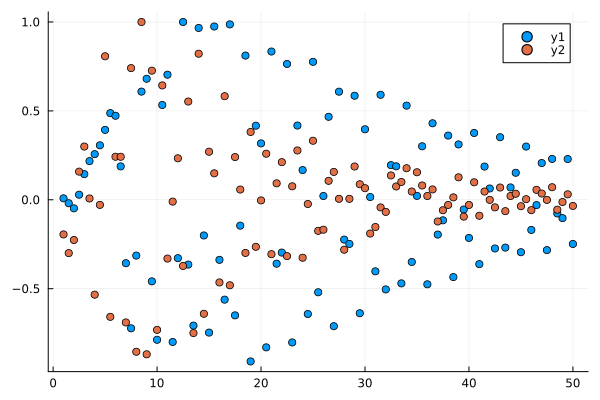

In [17]:
scatter(1.0:0.5:50.0, real(Z_class[1:99,5])./maximum(real(Z_class[1:99,5])))
scatter!(1.0:0.5:50.0, real(Z[1:99,5])./maximum(real(Z[1:99,5])))

Toy1 amplitude vs. cl.sol. injection

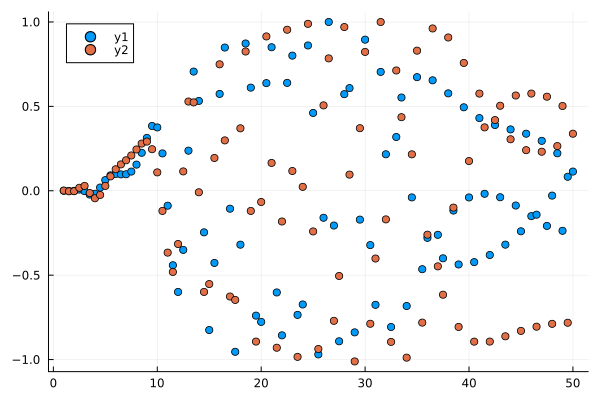

In [21]:
scatter(1.0:0.5:50.0, real(Z_class_toy1[1:99,5])./maximum(real(Z_class_toy1[1:99,5])))
scatter!(1.0:0.5:50.0, real(Z_toy1[1:99,5])./maximum(real(Z_toy1[1:99,5])))

Toy2 amplitude vs. cl. sol. injection

In [ ]:
scatter(1.0:0.5:50.0, real(Z_class_toy2[1:99,5])./maximum(real(Z_class_toy2[1:99,5])))
scatter!(1.0:0.5:50.0, real(Z_toy2[1:99,5])./maximum(real(Z_toy2[1:99,5])))

: 

Toy2 amplitude with phi measure vs. cl. sol. injection

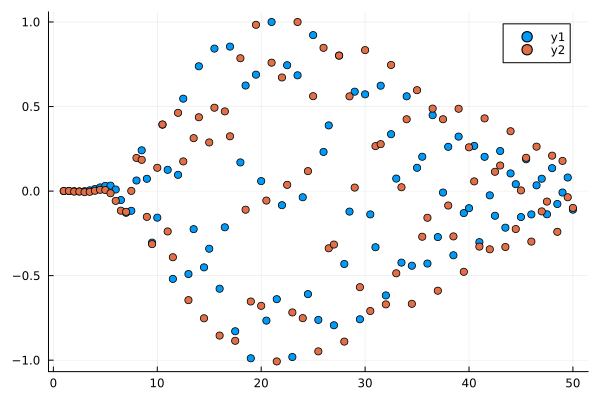

In [24]:
scatter(1.0:0.5:50.0, real(Z_class_toy2_phi_measure[1:99,5])./maximum(real(Z_class_toy2_phi_measure[1:99,5])))
scatter!(1.0:0.5:50.0, real(Z_toy2_phi_measure[1:99,5])./maximum(real(Z_toy2_phi_measure[1:99,5])))

## Comparing expectation values

Effective amplitude

In [43]:
println("<b0> = ", wynn(acc_triang(Zb0, 399))/wynn(acc_triang(Z, 399)))
println("<b1> = ", wynn(acc_triang(Zb1, 399))/wynn(acc_triang(Z, 399)))
println("<a1> = ", wynn(acc_triang(Za1, 399))/wynn(acc_triang(Z, 399)))

<b0> = 22.04874600325662 + 5.05957932143646im
<b1> = 12.75604169757879 - 1.0004710505381542im
<a1> = 2.5588234845621654 - 1.8300081194158888im


Toy1 amplitude

In [44]:
println("<b0> = ", wynn(acc_rect(Zb0_toy1, 399))/wynn(acc_rect(Z_toy1, 399)))
println("<b1> = ", wynn(acc_rect(Zb1_toy1, 399))/wynn(acc_rect(Z_toy1, 399)))
println("<a1> = ", wynn(acc_rect(Za1_toy1, 399))/wynn(acc_rect(Z_toy1, 399)))

<b0> = 35.077747435431206 + 3.119928951601397im
<b1> = 17.962736777607947 - 8.031366557056732im
<a1> = -23.03387969906239 + 23.154857635705067im


Toy2 amplitude

In [45]:
println("<b0> = ", wynn(acc_rect(Zb0_toy2, 399))/wynn(acc_rect(Z_toy2, 399)))
println("<b1> = ", wynn(acc_rect(Zb1_toy2, 399))/wynn(acc_rect(Z_toy2, 399)))
println("<a1> = ", wynn(acc_rect(Za1_toy2, 399))/wynn(acc_rect(Z_toy2, 399)))

<b0> = 52.46237182517805 + 19.268597353356434im
<b1> = 7.348847010159507 + 8.678704953817661im
<a1> = 4.4283633633292885 - 3.872967375071203im


Toy2 phi measure amplitude

In [46]:
println("<b0> = ", wynn(acc_rect(Zb0_toy2_phi_measure, 399))/wynn(acc_rect(Z_toy2_phi_measure, 399)))
println("<b1> = ", wynn(acc_rect(Zb1_toy2_phi_measure, 399))/wynn(acc_rect(Z_toy2_phi_measure, 399)))
#println("<a1> = ", wynn(acc_rect(Za1_toy2, 399))/wynn(acc_rect(Z, 399)))

<b0> = 51.27445422089521 - 27.22689409706731im
<b1> = 49.07872028454914 + 21.997355030304217im


# Old bulk slice computations

In [62]:
Z = [vegas((x,f) -> f[1] = real(-1/((1 - x[1])^2) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1] + im*(
vegas((x,f) -> f[1] = imag(-1/((1 - x[1])^2) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1]) for b0 in range(1,20,65), b1 in range(1,20,65)]
Za = [vegas((x,f) -> f[1] = real(-1/((1 - x[1])^2) * (1/(1 - x[1]) - 1) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1] + im*(
vegas((x,f) -> f[1] = imag(-1/((1 - x[1])^2) * (1/(1 - x[1]) - 1) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1]) for b0 in range(1,20,65), b1 in range(1,20,65)]

In [ ]:
scatter(real(acc(Z,65)))
scatter!(real(acc(Za,65)))

In [ ]:
range(1,20,65)

In [ ]:
wynn(acc(Za,60)[3:60])/wynn(acc(Z,60)[3:60])

The value gets closer to the classical solution if the spectrum is refined

In [ ]:
scatter(real(acc_rect(Z,60)))
scatter!(real(acc_rect(Za,60)))

In [ ]:
wynn(acc_rect(Za,60))/wynn(acc_rect(Z,60))

In [ ]:
acc_rect(Za,60)

In [ ]:
sum(Za)